<a href="https://colab.research.google.com/github/Vengadore/Notebooks/blob/master/Data_analysis_PDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download dataset
from IPython.display import clear_output
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!sudo chmod 777 "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!mv "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1" "PDR.rar"
!unrar x PDR.rar
!rm PDR.rar
clear_output(wait=False)

print("Data downloaded")

In [ ]:
!git clone --depth 1 https://github.com/Vengadore/Segmentation_OPTOS.git

In [ ]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
path = "./"
Data1 = pd.read_csv(os.path.join(path,'gTruthP1.csv'))
Data2 = pd.read_csv(os.path.join(path,'gTruthP2.csv'))

In [ ]:
## Add full path for Data1
Data1['imageFilename'] = Data1['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 1 (PDR)"),x))
Data1.head()

,imageFilename,Label,x,y,x_width,y_width
0,F:\CesarCarrillo\DATA BASES\PDR\Parte 1 (PDR)\...,NV,2196,1132,583,1092
1,F:\CesarCarrillo\DATA BASES\PDR\Parte 1 (PDR)\...,AR,2815,1257,104,71
2,F:\CesarCarrillo\DATA BASES\PDR\Parte 1 (PDR)\...,AR,3305,875,83,54
3,F:\CesarCarrillo\DATA BASES\PDR\Parte 1 (PDR)\...,AR,2115,2455,46,40
4,F:\CesarCarrillo\DATA BASES\PDR\Parte 1 (PDR)\...,AR,2133,2511,59,60


In [ ]:
## Add full path for Data2
Data2['imageFilename'] = Data2['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 2 (PDR)"),x))
Data2.head()

,imageFilename,Label,x,y,x_width,y_width
0,F:\CesarCarrillo\DATA BASES\PDR\Parte 2 (PDR)\...,AR,1305,1649,107,94
1,F:\CesarCarrillo\DATA BASES\PDR\Parte 2 (PDR)\...,NV,494,712,400,527
2,F:\CesarCarrillo\DATA BASES\PDR\Parte 2 (PDR)\...,AR,1994,1469,65,70
3,F:\CesarCarrillo\DATA BASES\PDR\Parte 2 (PDR)\...,AR,1219,1306,71,53
4,F:\CesarCarrillo\DATA BASES\PDR\Parte 2 (PDR)\...,AR,829,564,35,25


In [ ]:
Data = Data1.append(Data2).reset_index()
Data = Data[['imageFilename','Label','x','y','x_width','y_width']]

(-0.5, 2815.5, 1879.5, -0.5)

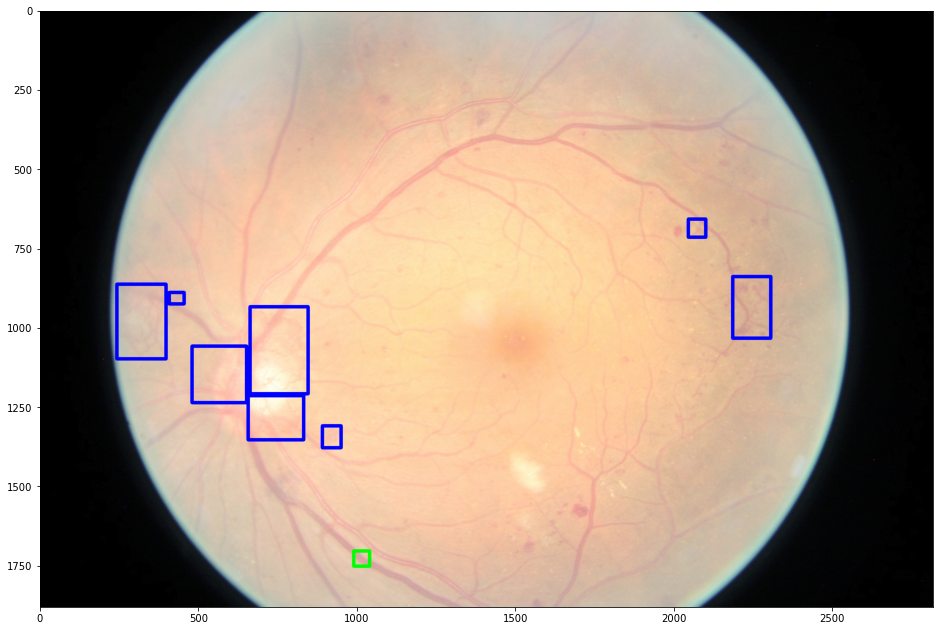

In [ ]:
i = 14
I = cv2.imread(Data.iloc[i].imageFilename)
I = cv2.cvtColor(I,4)
#I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
#I[:,:,0] = cv2.equalizeHist(I[:,:,0])
#I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
I = np.array(I)

File_name = Data.iloc[i].imageFilename;
while(Data.iloc[i].imageFilename == File_name):
    if Data.iloc[i].Label == "AR":
        color = (0,255,0)
    else:
        color = (0,0,255)
    I = cv2.rectangle(I,
                     (Data.iloc[i].x,Data.iloc[i].y),
                     (Data.iloc[i].x + Data.iloc[i].x_width, Data.iloc[i].y + Data.iloc[i].y_width),color, 10)
    i += 1
plt.figure(figsize = (16,16))
plt.imshow(I)
plt.axis('on')

In [ ]:
I.shape

(1880, 2816, 3)

In [ ]:
I.dtype

dtype('uint8')

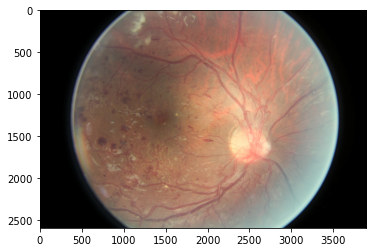

In [ ]:
I = cv2.imread(Data.iloc[0].imageFilename)
I = cv2.cvtColor(I,4)
plt.imshow(I)

In [ ]:
Data.groupby(['Label']).count()

,imageFilename,x,y,x_width,y_width
Label,,,,,
AR,411,411,411,411,411
NV,470,470,470,470,470


## Area of bounding boxes

In [ ]:
Data['Area'] = Data['x_width']*Data['y_width']

### Neovessels analysis

STD =  370625.29919405456


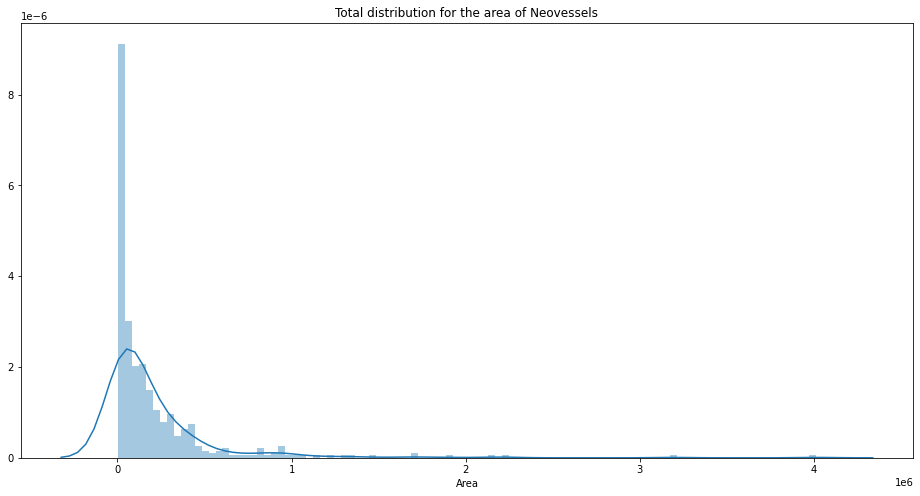

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "NV"]["Area"],bins = 100)
plt.title("Total distribution for the area of Neovessels")
print("STD = ",np.std(Data[Data['Label'] == "NV"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $0.05 \times 1e7 $

STD =  120311.61899665411


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
NV,304,304,304,304,304,304


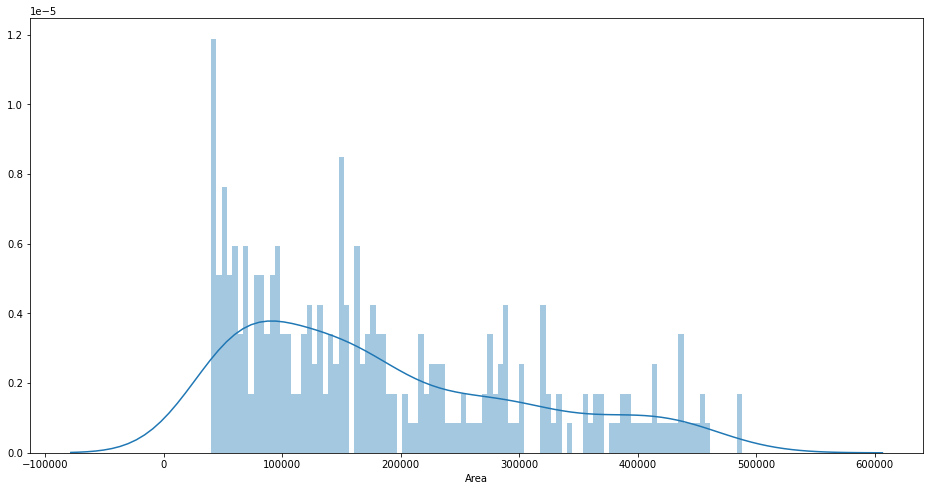

In [ ]:
## Areas to keep
Data_NV = Data[Data['Label'] == "NV"].copy()
#Data_NV = Data_NV[Data_NV['Area'] < 0.05*1e7]
Data_NV = Data_NV[Data_NV['Area'] > 40000] ## Added to get rid of the smallest data
plt.figure(figsize=(16,8))
sns.distplot(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"],bins = 100)
print("STD = ",np.std(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"].values))
Data_NV.groupby(['Label']).count()

By doing this the number of images decreased from 471 to 429 with a much lower $\sigma$.
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [ ]:
print("x_width Mean = ",np.mean(Data_NV['x_width'].values))
print("x_width Mean = ",np.mean(Data_NV['y_width'].values))

x_width Mean =  494.04276315789474
x_width Mean =  502.1578947368421


Given this analysis we can propose a network of an input shape of (312,312,3)

### Arrosariamiento analysis

STD =  20081.890329476148


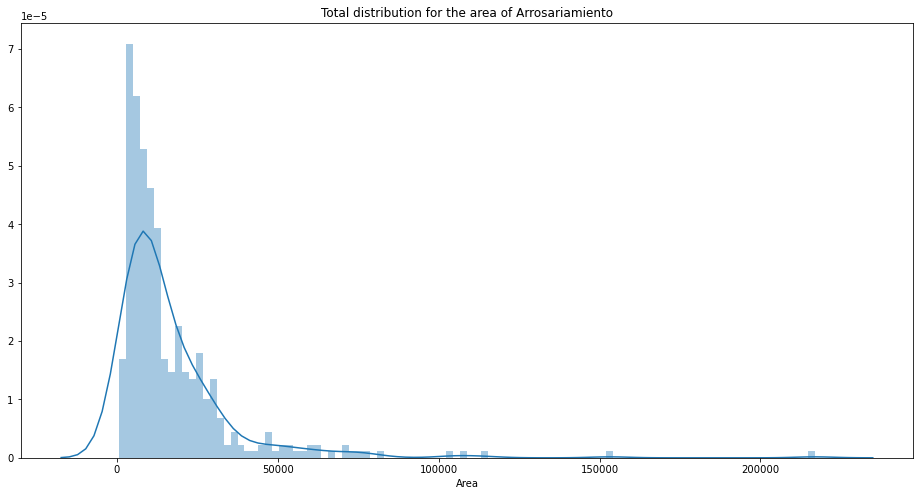

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "AR"]["Area"],bins = 100)
plt.title("Total distribution for the area of Arrosariamiento")
print("STD = ",np.std(Data[Data['Label'] == "AR"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $100 000$

STD =  14133.934987419996


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
AR,406,406,406,406,406,406


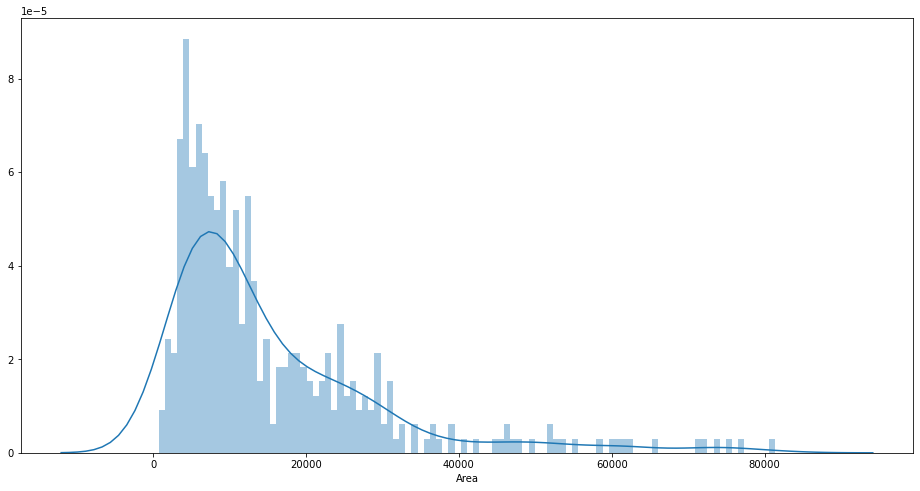

In [ ]:
## Areas to keep
Data_AR = Data[Data['Label'] == "AR"].copy()
Data_AR = Data_AR[Data_AR['Area'] < 100000]
plt.figure(figsize=(16,8))
sns.distplot(Data_AR["Area"],bins = 100)
print("STD = ",np.std(Data_AR["Area"].values))
Data_AR.groupby(['Label']).count()

By doing this the number of images decreased from 413 to 406 with a much lower $\sigma$ 
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [ ]:
print("x_width Mean = ",np.mean(Data_AR['x_width'].values))
print("x_width Mean = ",np.mean(Data_AR['y_width'].values))

x_width Mean =  126.27832512315271
x_width Mean =  111.12068965517241


Given this analysis we can propose a network of an input shape of (128,128,3)

# NEOVESSELS VISUALIZATION

In [ ]:
Data_NV = Data_NV.reset_index().drop(["index"],axis=1)

(318, 310)
(333, 158)
(245, 297)
(592, 544)
(463, 406)
(648, 462)


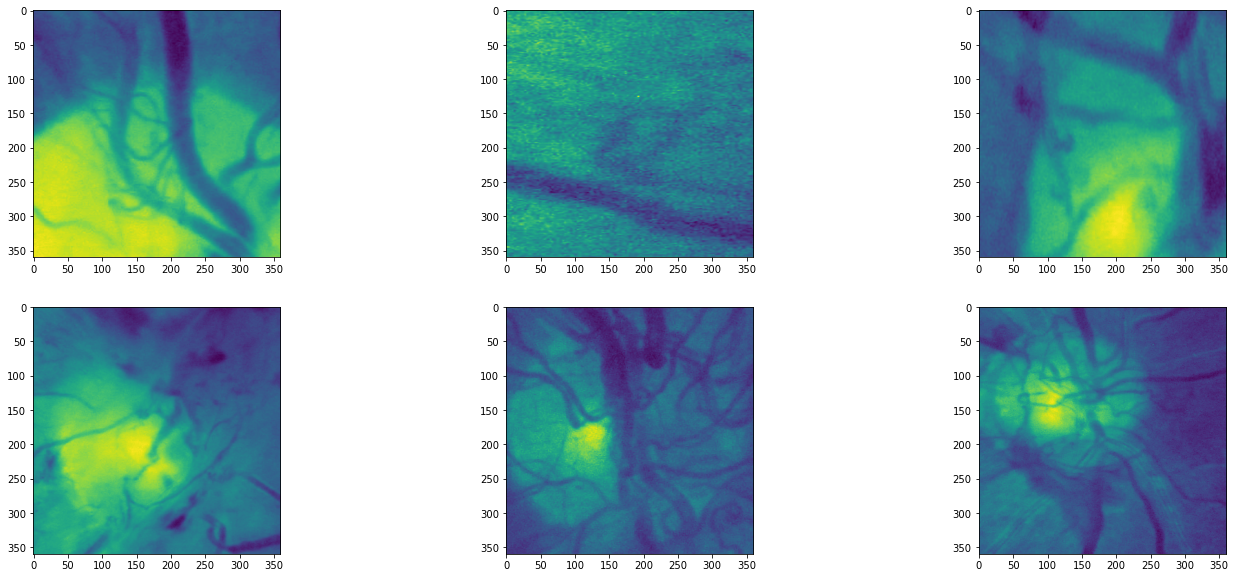

In [ ]:
nr,ncol = (2,3)
fig,axs = plt.subplots(nr,ncol,figsize = (ncol*8,nr*5))
indx_rand = np.random.randint(0,len(Data_NV),nr*ncol)
k = 0
for i in range(1,nr+1):
    for j in range(1,ncol+1):
        ## Read the image
        I = cv2.imread(Data_NV.iloc[indx_rand[k]]['imageFilename'])
        # Coordinates for the patch
        x = int(Data_NV.iloc[indx_rand[k]]['x'])
        y = int(Data_NV.iloc[indx_rand[k]]['y'])
        x_width = int(Data_NV.iloc[indx_rand[k]]['x_width'])
        y_width = int(Data_NV.iloc[indx_rand[k]]['y_width'])
        #I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
        #I[:,:,0] = cv2.equalizeHist(I[:,:,0])
        #I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
        #I = cv2.cvtColor(I, 4)
        I = I[:,:,1]
        ## Extract patch
        I = I[y:y+y_width,x:x+x_width]
        print(I.shape)
        I = cv2.resize(I,(360,360),interpolation = cv2.INTER_LANCZOS4)
        axs[i-1][j-1].imshow(I)
        k += 1

By this point we identified the regions in our dataset with the presence of neovessels, we will try to create a binary classification

**Classes**:
 * NEOVESSELS
 * HEALTHY

### DATA GENERATOR
For this task we will use the data generator 

In [ ]:
from Segmentation_OPTOS.Tools.Generators.Binary_generator import Generator_from_DataFrame
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(Data_NV,test_size = 0.2)
X_train = Generator_from_DataFrame(train,X = 'imageFilename',batch_size=8)
X_test = Generator_from_DataFrame(test,X = 'imageFilename',batch_size=8)

243 files found out of 243 in the DataFrame for X
A generator object has been created with 243 elements of batch_size = 8
61 files found out of 61 in the DataFrame for X
A generator object has been created with 61 elements of batch_size = 8


# Network definition

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
base = DenseNet201(include_top=False,
                    weights="imagenet",
                    input_shape = (224,224,3),
                    classes=2)

74842112/74836368 [==============================] - 836s 11us/step


In [ ]:
model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
flatten (Flatten)            (None, 94080)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                940810    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 19,262,805
Trainable params: 19,033,749
Non-trainable params: 229,056
_________________________________________________________________


In [ ]:
model.compile(optimizer  = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,epochs = 10,steps_per_epoch = len(train),validation_data = X_test,validation_steps = len(test))